In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [2]:
#Importing the dataset

df = pd.read_csv('tripadvisor_hotel_reviews.csv')

## Dataset Checks/Exploration (EDA)

In [3]:
df.info()

#Using this function allows me to evaluate the dataset to the extent of knowing the data types of each column, look for any null values in the dataset
#and gather the amount of rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [5]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [7]:
reduced_df = df.sample(frac=0.1)

#reducing the size of the dataset to save ram/computing power (efficiency), this function will randomly pick sample 10% from the original dataset

In [9]:
print(reduced_df.duplicated().sum())

#Checking for duplictions within the dataset, the function returns a boolean True and False. Ideally dupocations aren't desired as they might compromise the validity of a model.

0


In [10]:
reduced_df['Sentiment'] = df.Rating.apply(lambda x: 0 if x in [1,2]else 1)

#Adding the sentiment column which will be denoted by 1's and 0's. this will help later on with our logistic regression for this sentimental analysis

Text(0.5, 1.0, 'Class Distribution')

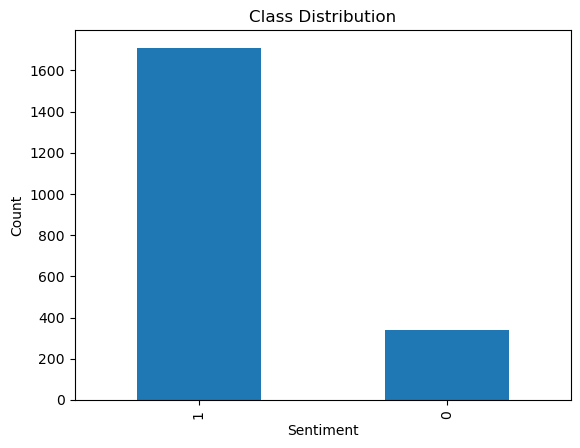

In [11]:
reduced_df['Sentiment'].value_counts().plot.bar()
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Class Distribution')

#Exploring the class distribution

In [12]:
X = reduced_df['Review']

In [13]:
Y = reduced_df['Sentiment']

In [14]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [15]:
X_clean = X.apply(lambda x: remove_punctuation(x))
X_clean.head()

#Applying the function of removing the the puctuation and displaying the top results

8171     no complaints located hotel wife pleased quali...
16391    okay decor nice new desk staff uppity professi...
2812     wished stayed longer best trip water great san...
2336     loved new orleans number times having recently...
3353     depends looking went pr labor day weekend cele...
Name: Review, dtype: object

In [16]:
X_lower = X_clean.apply(lambda x : x.lower())
X_lower.head()

#Converting the stings to lower case and displaying the top results

8171     no complaints located hotel wife pleased quali...
16391    okay decor nice new desk staff uppity professi...
2812     wished stayed longer best trip water great san...
2336     loved new orleans number times having recently...
3353     depends looking went pr labor day weekend cele...
Name: Review, dtype: object

In [17]:
def tokenize(data):
    for x  in data:
        output = data.split()
    return output    

In [18]:
tokens = X_lower.apply(lambda x : tokenize(x))
tokens

8171     [no, complaints, located, hotel, wife, pleased...
16391    [okay, decor, nice, new, desk, staff, uppity, ...
2812     [wished, stayed, longer, best, trip, water, gr...
2336     [loved, new, orleans, number, times, having, r...
3353     [depends, looking, went, pr, labor, day, weeke...
                               ...                        
7547     [awesome, resort, terrible, spa, took, entire,...
16785    [garden, eden, resort, best, stayed, husband, ...
17629    [absolutely, fantastic, hotel, just, returned,...
5220     [perfect, paris, business, meeting, hotel, bad...
7071     [loved, just, came, june, 21, best, secrets, p...
Name: Review, Length: 2049, dtype: object

In [26]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rapha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rapha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rapha\AppData\Roaming\nltk_data...


True

In [25]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
def remove_stopwords(text):
    output = [i for i in text if i not in stopwords]
    return output

In [29]:
clean_data = tokens.apply(lambda x: remove_stopwords (x))
clean_data

8171     [complaints, located, hotel, wife, pleased, qu...
16391    [okay, decor, nice, new, desk, staff, uppity, ...
2812     [wished, stayed, longer, best, trip, water, gr...
2336     [loved, new, orleans, number, times, recently,...
3353     [depends, looking, went, pr, labor, day, weeke...
                               ...                        
7547     [awesome, resort, terrible, spa, took, entire,...
16785    [garden, eden, resort, best, stayed, husband, ...
17629    [absolutely, fantastic, hotel, returned, 4, ni...
5220     [perfect, paris, business, meeting, hotel, bad...
7071     [loved, came, june, 21, best, secrets, place, ...
Name: Review, Length: 2049, dtype: object

In [30]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()

#defining the object for Lemmatization

In [31]:
def lemmatize_words(text):
    lemmatized_output = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_output

In [33]:
X_lemmatized = clean_data.apply(lambda x: lemmatize_words(x))
X_lemmatized.head()

8171     [complaint, located, hotel, wife, pleased, qua...
16391    [okay, decor, nice, new, desk, staff, uppity, ...
2812     [wished, stayed, longer, best, trip, water, gr...
2336     [loved, new, orleans, number, time, recently, ...
3353     [depends, looking, went, pr, labor, day, weeke...
Name: Review, dtype: object

In [35]:
final_df = X_lemmatized.map(' '.join)
final_df

8171     complaint located hotel wife pleased quality s...
16391    okay decor nice new desk staff uppity professi...
2812     wished stayed longer best trip water great san...
2336     loved new orleans number time recently stayed ...
3353     depends looking went pr labor day weekend cele...
                               ...                        
7547     awesome resort terrible spa took entire family...
16785    garden eden resort best stayed husband stayed ...
17629    absolutely fantastic hotel returned 4 night ba...
5220     perfect paris business meeting hotel bad leave...
7071     loved came june 21 best secret place staythe i...
Name: Review, Length: 2049, dtype: object

# Model, Testing and Evaluation

In [40]:
vectorizer = CountVectorizer()

In [41]:
train_vector = vectorizer.fit_transform(final_df)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_vector, Y, test_size=0.5, random_state=24)

In [58]:
smote = SMOTE(random_state=42)

#The data is not balanced as dipicted in the graph at the top

In [46]:
lr = LogisticRegression()

In [47]:
pipeline = Pipeline([
    ('smote', smote),
    ('LogisticRegression', lr)
])

In [59]:
pipeline.fit(X_train,y_train)

#Creating a pipeline

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('LogisticRegression', LogisticRegression())])

In [50]:
y_pred =pipeline.predict(X_test)

#Predict the class labels for the test data using logistic regression


In [53]:
accuracy = accuracy_score(y_test,y_pred)

#Calculates the accuracy of the predicted labels compared to the true labels

In [54]:
precision = precision_score(y_test,y_pred)

#Calculates the recal of the predicted labels compared to the true labels

In [56]:
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [57]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.66      0.63       164
           1       0.93      0.91      0.92       861

    accuracy                           0.87      1025
   macro avg       0.77      0.79      0.78      1025
weighted avg       0.88      0.87      0.88      1025

